# Capturar imagem a partir da raspicam

In [ ]:
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import cv2
import os

In [ ]:
# initialize the camera and grab a reference to the raw camera capture
camera = PiCamera()
rawCapture = PiRGBArray(camera)

In [ ]:
# Para evitar que a camera aqueça, pode-se colocar sleep (dentro dos ciclos, a seguir é uma exemplificação)
time.sleep(0.1)

In [ ]:
# grab an image from the camera
camera.capture(rawCapture, format="bgr")
image = rawCapture.array

In [ ]:
print(type(image))

In [ ]:
# Em JUPYTER usar plt.imshow em vez de cv2.imshow
# display the image on screen and wait for a keypress
# cv2.imshow("Image", image)
# cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

# PS: Executar isto 2x se a imagem não aparecer à primeira

In [ ]:
cv2.imwrite(os.path.join("imagem-raspicam.png"), image)

# Capturar imagem pela camera USB

In [ ]:
import os
import cv2
import time
import datetime

In [ ]:
camera_id = 0
video_capture = cv2.VideoCapture(camera_id)

In [ ]:
ret, frame = video_capture.read()

In [ ]:
# Exemplo de como dar sempre um nome novo a cada captura
# timename=datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d-%H%M%S')
# frame_id = 1
# cv2.imwrite(os.path.join( "f-" + timename + "-" + '%0*d' % (5, frame_id) + ".png"), frame)

cv2.imwrite(os.path.join("imagem-usb.png"), frame)
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
# Em JUPYTER usar plt.imshow em vez de cv2.imshow
# display the image on screen and wait for a keypress
# cv2.imshow("Image", frame)
# cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.imshow(frame)
plt.show()

# Abrir imagem a aprtir de URL

In [ ]:
import numpy as np
import urllib
import cv2
import os

In [ ]:
url = "https://cbsnews1.cbsistatic.com/hub/i/2016/12/14/4b7e3037-b62b-4f21-9e5c-1c181da45a6a/screen-shot-2016-12-14-at-4-25-12-pm.png"
url = "https://upload.wikimedia.org/wikipedia/en/f/ff/SuccessKid.jpg"

In [ ]:
# Exemplo de como importar os modulos em função da versão do Python:
import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
elif sys.version_info[0] == 2:
    from urllib import urlopen

resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [ ]:
# Em JUPYTER usar plt.imshow em vez de cv2.imshow
# display the image on screen and wait for a keypress
# cv2.imshow("Image", frame)
# cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [ ]:
# Salvar imagem no disco
cv2.imwrite(os.path.join("imagem-net.png"), image)
cv2.destroyAllWindows()

# Abrir imagem a partir de ficheiro

In [ ]:
import numpy as np
import cv2
import os

In [ ]:
path = "./imagem-net.png"
image = cv2.imread(path)

In [ ]:
# Em JUPYTER usar plt.imshow em vez de cv2.imshow
# display the image on screen and wait for a keypress
# cv2.imshow("Image", image)
# cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

# Imagem Shape

In [ ]:
import cv2

# load the image and show some basic information on it
image = cv2.imread('imagem-net.png')   # returns a NumPy array representing the image
print("width: %d pixels" % (image.shape[1]))
print("height: %d pixels" % (image.shape[0]))
print("channels: %d" % (image.shape[2]))

# show the image and wait for a keypress
# cv2.imshow("Image", image)  # DESCOMENTAR QUEM TIVER ACESSO SSH -X e estiver a executar pela consola
# cv2.waitKey(0)  # DESCOMENTAR QUEM TIVER ACESSO SSH -X e estiver a executar pela consola

# save the image -- OpenCV handles converting filetypes
# automatically
cv2.imwrite("newimage.jpg", image)

# Get and Set pixels

In [ ]:
image = cv2.imread('imagem-net.png')
# Em JUPYTER usar plt.imshow em vez de cv2.imshow
# display the image on screen and wait for a keypress
# cv2.imshow("Image", image)
# cv2.waitKey(0)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [ ]:
(h, w) = image.shape[:2]
print("Altura:", h, "Largura:", w)
(b, g, r) = image[200, 50]
print("Pixel at (y=200, x=50) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

In [ ]:
# now, let's change the value of the pixel at (0, 0) and make it red
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

In [ ]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (int(w/2), int(h/2))
print("Centro:", cX, cY)

In [ ]:
# Como estamos a manipular matrizes numpy, podemos selecionar sub-partes da matriz
# top-left corner
tl = image[0:cY, 0:cX]  # extract the [0, cX) and [0, cY) region of the image
plt.imshow(tl)
plt.show()

In [ ]:
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]

In [ ]:
plt.imshow(tr)
plt.show()
plt.imshow(br)
plt.show()
plt.imshow(bl)
plt.show()

In [ ]:
# Colocar primeiro quadrante a verde
image[0:cY, 0:cX] = (0, 255, 0)

In [ ]:
plt.imshow(image)
plt.show()

# Drawing

In [ ]:
import numpy as np
import cv2
import os

In [ ]:
# Inicializar uma imagem a preto, com 3 canais
image = np.zeros((300, 300, 3), dtype="uint8")
plt.imshow(image)
plt.show()

In [ ]:
green = (0, 255, 0)
cv2.line(image, (0, 0), (300, 300), green)
plt.imshow(image)
plt.show()

In [ ]:
red = (0, 0, 255)
cv2.line(image, (300, 0), (0, 300), red, 3)
plt.imshow(image)
plt.show()

In [ ]:
cv2.rectangle(image, (10, 10), (60, 60), green)
plt.imshow(image)
plt.show()

In [ ]:
cv2.rectangle(image, (50, 200), (200, 225), red, 5)
plt.imshow(image)
plt.show()

In [ ]:
blue = (255, 0, 0)
cv2.rectangle(image, (200, 50), (225, 125), blue, -1)
plt.imshow(image)
plt.show()

In [ ]:
# Reset da imagem
image = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (int(canvas.shape[1] / 2), int(canvas.shape[0] / 2))
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(image, (centerX, centerY), r, white)

plt.imshow(image); plt.show()

In [ ]:
for i in range(0, 25):
    # randomly generate a radius size between 5 and 200, generate a random
    # color, and then pick a random point on our canvas where the circle
    # will be drawn
    radius = np.random.randint(5, high=200)
    color = np.random.randint(0, high=256, size=(3,)).tolist()
    pt = np.random.randint(0, high=300, size=(2,))

    # draw our random circle
    cv2.circle(image, tuple(pt), radius, color, -1)
plt.imshow(image); plt.show()

# Algumas manipulações básicas em imagens

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
image = cv2.imread('imagem-net.png')

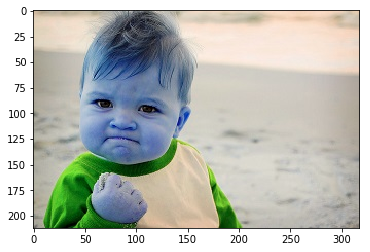

In [3]:
plt.imshow(image); plt.show()

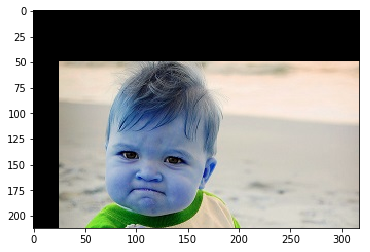

In [4]:
# Translations
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt.imshow(shifted); plt.show()

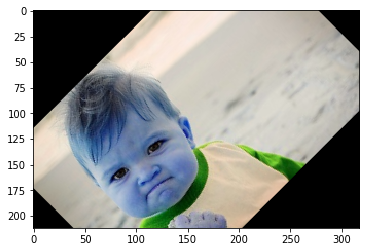

In [5]:
# Rotation
(h, w) = image.shape[:2]
(cX, cY) = (int(w / 2), int(h / 2))
angle = 45
M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated); plt.show()

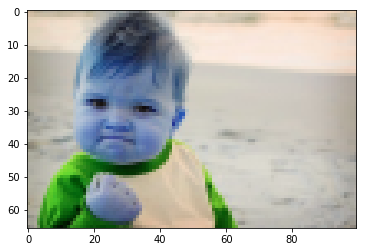

In [6]:
# Resize
nova_largura = 100
r = nova_largura / image.shape[1]
dim = (nova_largura, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized); plt.show()

Method: cv2.INTER_NEAREST:


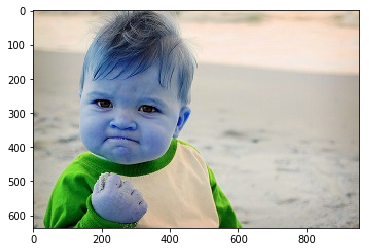

Method: cv2.INTER_LINEAR:


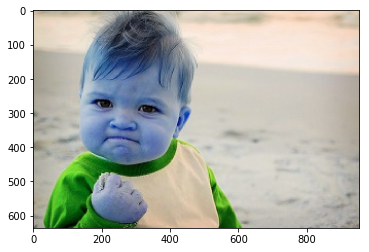

Method: cv2.INTER_AREA:


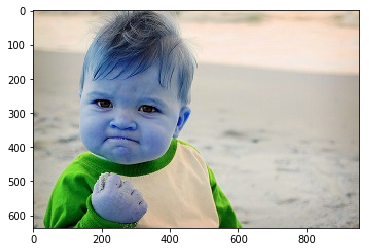

Method: cv2.INTER_CUBIC:


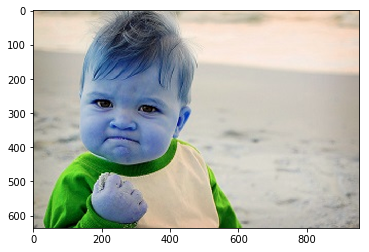

Method: cv2.INTER_LANCZOS4:


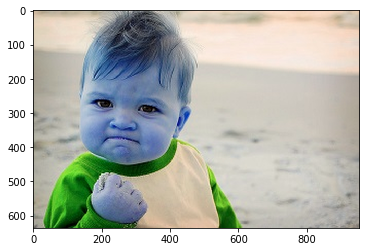

In [7]:
methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]
for (name, method) in methods:
    # increase the size of the image by 3x using the current interpolation
    # method
    resized = imutils.resize(image, width=image.shape[1] * 3, inter=method)
    # cv2.imshow("Method: {}".format(name), resized)
    # cv2.waitKey(0)
    print("Method: {}:".format(name))
    plt.imshow(resized); plt.show()

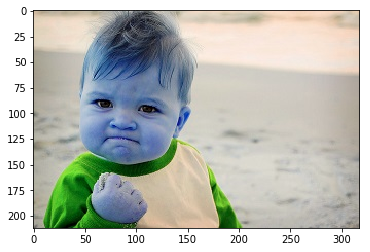

Horizontal:


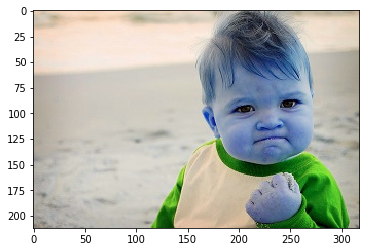

Vertical:


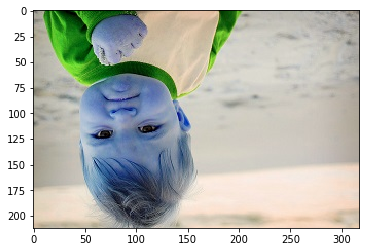

Horizontal e Vertical:


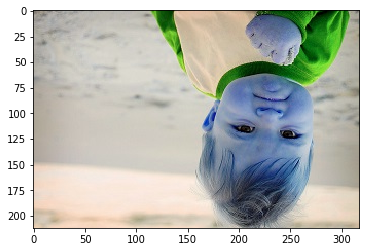

In [8]:
# Flip
plt.imshow(image); plt.show()
print("Horizontal:")
flipped = cv2.flip(image, 1)
plt.imshow(flipped); plt.show()
print("Vertical:")
flipped = cv2.flip(image, 0)
plt.imshow(flipped); plt.show()
print("Horizontal e Vertical:")
flipped = cv2.flip(image, -1)
plt.imshow(flipped); plt.show()

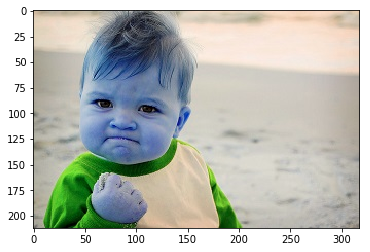

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


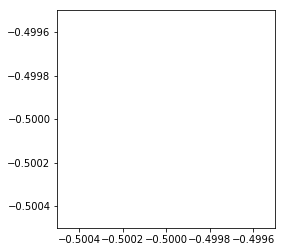

In [9]:
# Crop
plt.imshow(image); plt.show()
face = image[50:50, 150:150]
plt.imshow(face); plt.show()

In [10]:
# Arithmetic
print("max of 255: " + str(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: " + str(cv2.subtract(np.uint8([50]), np.uint8([100]))))

max of 255: [[255]]
min of 0: [[0]]


In [11]:
# 
print("Overflow: " + str(np.uint8([200]) + np.uint8([100])))
print("Overflow: " + str(np.uint8([50]) - np.uint8([100])))

Overflow: [44]
Overflow: [206]


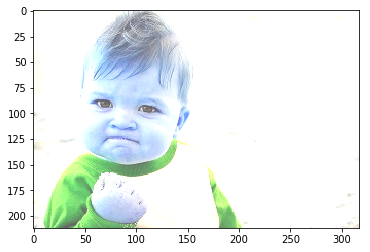

In [12]:
# let's increase the intensity of all pixels in our image by 100 -- we
# accomplish this by constructing a NumPy array that is the same size of
# our matrix (filled with ones) and the multiplying it by 100 to create an
# array filled with 100's, then we simply add the images together; notice
# how the image is "brighter"
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
# cv2.imshow("Added", added)
plt.imshow(added); plt.show()

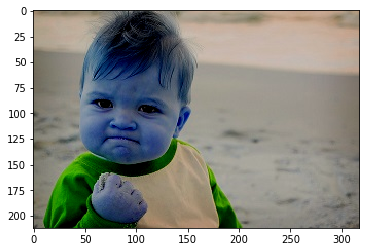

In [13]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
# cv2.imshow("Subtracted", subtracted)
# cv2.waitKey(0)
plt.imshow(subtracted); plt.show()

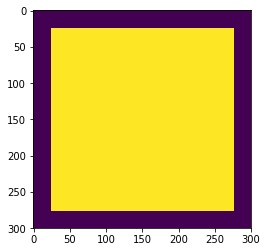

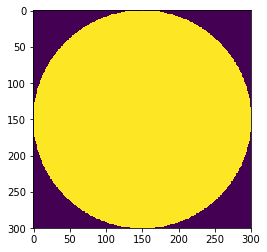

In [15]:
# Bitwise
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plt.imshow(rectangle); plt.show()
circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt.imshow(circle); plt.show()

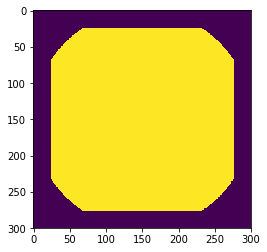

In [16]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.imshow(bitwiseAnd); plt.show()

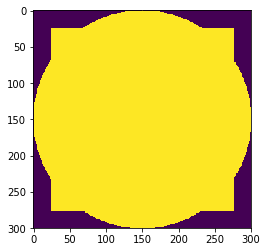

In [17]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt.imshow(bitwiseOr); plt.show()

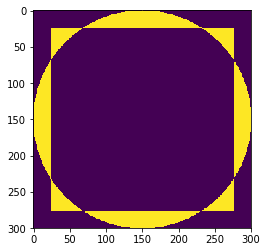

In [18]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt.imshow(bitwiseXor); plt.show()

In [19]:
bitwiseNot = cv2.bitwise_not(circle)

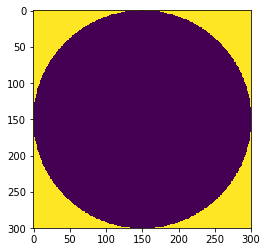

In [20]:
plt.imshow(bitwiseNot); plt.show()

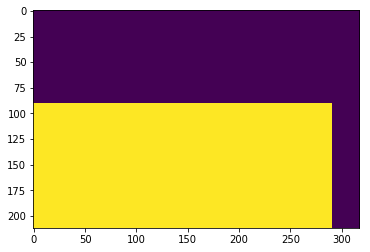

In [21]:
# Masking
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt.imshow(mask); plt.show()

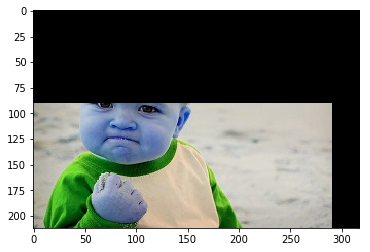

In [22]:
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked); plt.show()

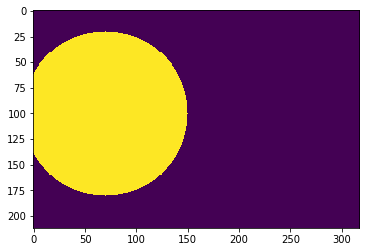

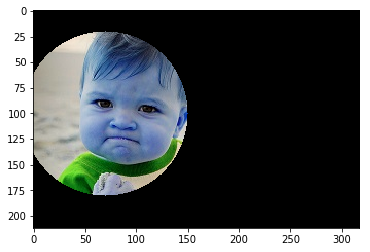

In [25]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (70, 100), 80, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(mask); plt.show()
plt.imshow(masked); plt.show()

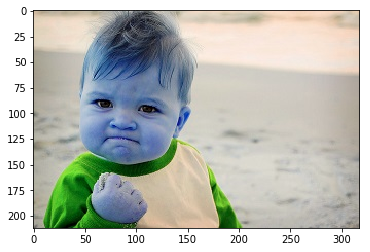

In [26]:
# Split and Merge
plt.imshow(image); plt.show()
(B, G, R) = cv2.split(image)

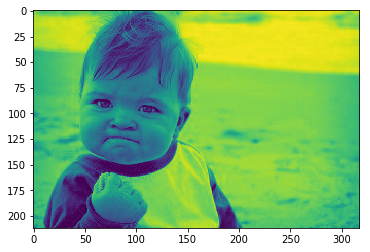

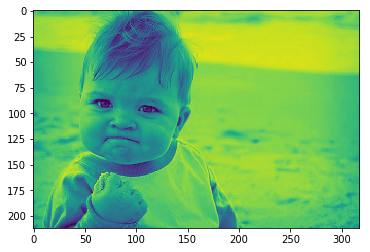

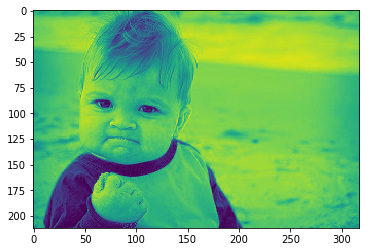

In [27]:
plt.imshow(B); plt.show()
plt.imshow(G); plt.show()
plt.imshow(R); plt.show()

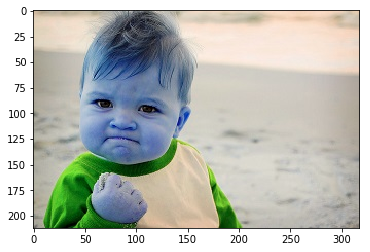

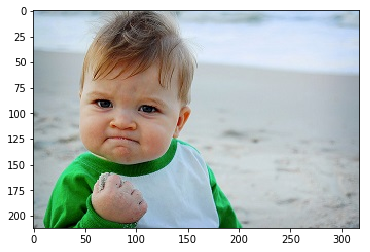

In [29]:
merged = cv2.merge([B, G, R])
plt.imshow(merged); plt.show()
merged = cv2.merge([R, G, B])
plt.imshow(merged); plt.show()

Red:


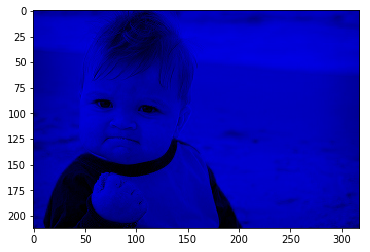

Green:


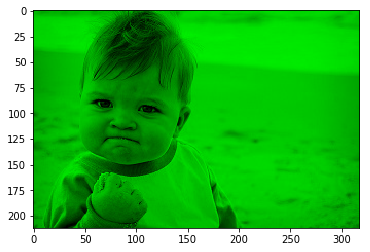

Blue:


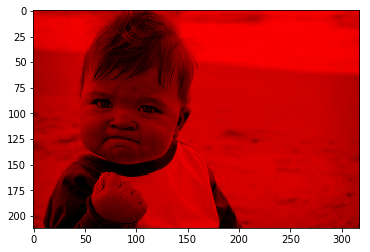

In [30]:
zeros = np.zeros(image.shape[:2], dtype="uint8")
print("Red:")
plt.imshow(cv2.merge([zeros, zeros, R])); plt.show()
print("Green:")
plt.imshow(cv2.merge([zeros, G, zeros,])); plt.show()
print("Blue:")
plt.imshow(cv2.merge([B, zeros, zeros,])); plt.show()

# Face detection - Foto

![Haar Cascade Visualization](https://i.makeagif.com/media/6-14-2015/S638MH.gif)

In [41]:
import cv2
import sys
import os

path = "./imagem-net.png"
image = cv2.imread(path)

cascPath = "./stuff/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

Queres mais classificadores treinados? -> Vê aqui alguns exemplos: https://github.com/opencv/opencv/tree/master/data/haarcascades

Queres treinar o teu classificador? -> Vê aqui um exemplo: 
https://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html

In [36]:
# Haar Cascade só funciona num canal. 
# Ler mais aqui: https://en.wikipedia.org/wiki/Haar-like_feature
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [37]:
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        #flags=cv2.cv.CV_HAAR_SCALE_IMAGE
   )

In [39]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

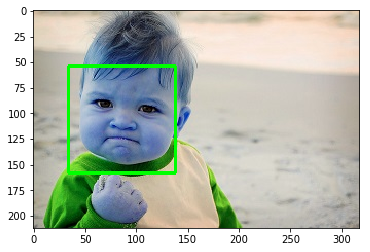

In [40]:
plt.imshow(image); plt.show()

# Face detection - Webcam
## (não executar no jupiter, vamos tentar `ssh -X pi@xxx.xxx.xxx.xxx`)

In [ ]:
import cv2
import sys
import os
if not os.path.exists('./stuff'):
    os.makedirs('./stuff')

if not os.path.exists('./stuff/haarcascade_frontalface_default.xml'):
    import requests
    URL = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    response = requests.get(URL)
    with open('./stuff/haarcascade_frontalface_default.xml', 'wb') as file:
        file.write(response.content)

# cascPath = sys.argv[1]
cascPath = './stuff/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        #flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # cv2.drawContours()

    # Display the resulting frame
    cv2.imshow('Video', frame)  ##################################### DESCOMENTAR Quando se usa SSH -X
    # cv2.imwrite(os.path.join("60-LastFrame.png"), frame)  ############# Comentar quando se usa SSH -X

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()